In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\suganya\day\sales.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.corr()["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [12]:
df = df.dropna().drop_duplicates()

In [13]:
df["TVxRadio"] = df["TV"] * df["Radio"]
features = ["TV","Radio","Newspaper","TVxRadio"]

In [14]:
X = df[features]
y = df["Sales"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled, y_train)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print("RF CV R2 mean:", np.mean(scores))

RF CV R2 mean: 0.9569200488589


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[50,100], "max_depth":[None,5,10], "min_samples_split":[2,5]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


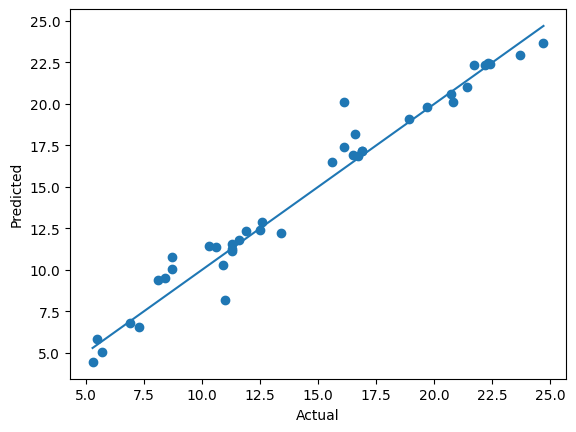

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [26]:
feat_imp = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=False)
print(feat_imp)
print("Linear coefs:", dict(zip(features, lr.coef_)))

TV           0.792892
TVxRadio     0.188516
Newspaper    0.011029
Radio        0.007562
dtype: float64
Linear coefs: {'TV': np.float64(3.7797307534030833), 'Radio': np.float64(0.6145934537638289), 'Newspaper': np.float64(0.08129871863997085), 'TVxRadio': np.float64(1.3280746036832136)}
